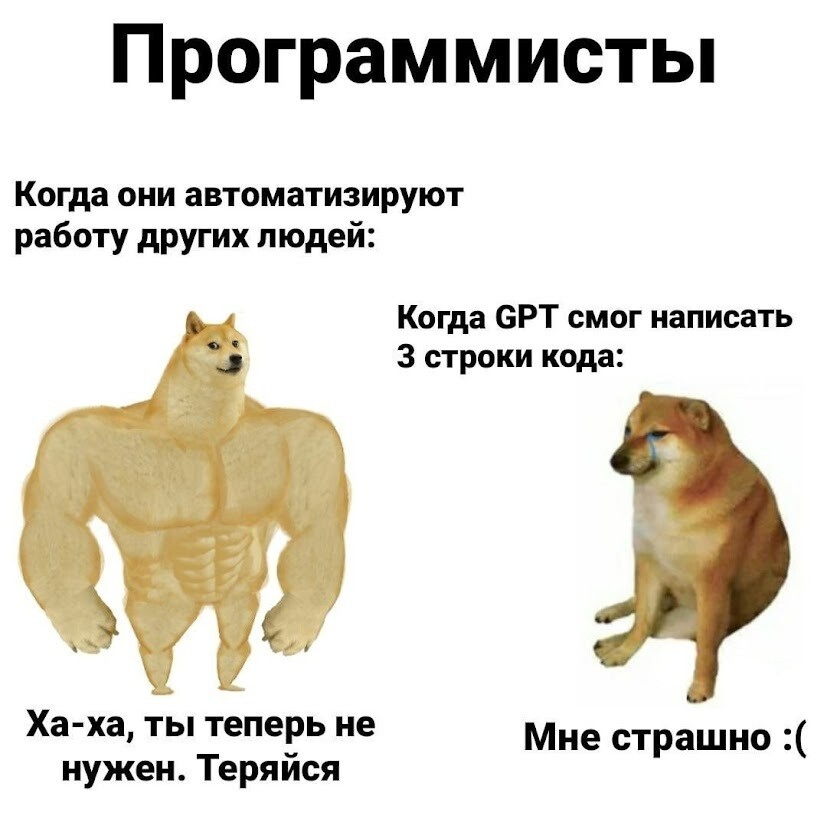

# Форматирование строк

Часто возникает необходимость выводить строки, содержание которых зависит от некоторых переменных в коде. Например:

```python
a = int(input())
b = int(input())
c = a + b
print('sum of', a,' and', b, ' =', c)
```

Такая запись становится неудобной и нечитаемой, когда у нас становится много переменных с длинными наименованиями. Для решения этой проблемы существует **форматирование строк**. В python есть несколько способов форматирования строк, которые немного отличаются функционалом и синтаксисом.
```python
str_1 = "Name: %s, email: %s, phone: %s" % (name, email, phone)
str_2 = "Name: {}, email: {}, phone: {}".format(name, email, phone)
```
В обоих случаях мы подставляем значения переменных name, email, phone в нужные места в строке. Несложно заметить, что здесь тоже возникают проблемы с читаемостью: необходимо сопоставлять порядок перечисления аргументов форматирования `name, email, phone` с позициями `%s` или `{}`.

Начиная с python 3.6 форматирование можно производить используя **f-строки** -- наиболее функциональный и удобный способ на данный момент. Таким способом мы можем записать наш пример так:

```python
f_str = f"Name: {name}, email: {email}, phone: {phone}"
```
Очень удобно и читаемо. Но на этом функционал не заканчивается, в фигурных скобках можно вычислять новые значения (и даже вызывать методы):
```python
num = 7
print(f'{num} squared is {num * num}')
>>> '7 squared is 49'
```

В форматированных строках можно указать количество десятичных знаков после запятой, количество символов, выделенных для вывода значения, а также выровнять значение по левому или правому краю. Общий синтаксис выглядит так:
```python
f'{value:{width}.{precision}}'
```
Значение, двоеточие, затем ширина строки в фигурных скобках, точка, требуемая точность в фигурных скобках. Пара примеров:
```python
pi = 3.14159265
print(f'{pi:.2f}') #выводим pi с двумя знаками после запятой
>>> '3.14'
```
```python
print(f'{5:>5}₽')  # ширина 5 символов, выравниванием вправо >
>>> '   5₽'
```

Момент катарсиса: форматированные строки могут работать с генераторами списков!

```python
list_a = ['a', 'b', 'c', 'd']
list_b = [f"{x + x}" for x in list_a]
print(list_b)
>>> "['aa', 'bb', 'cc', 'dd']"
```

Конечно, подобные операции можно реализовать и без перечисленных фишек. Однако использование удобных инструментов языка повышает наглядность решений и тем самым ускоряет процесс решения задач.


### Ещё про форматирование строк:

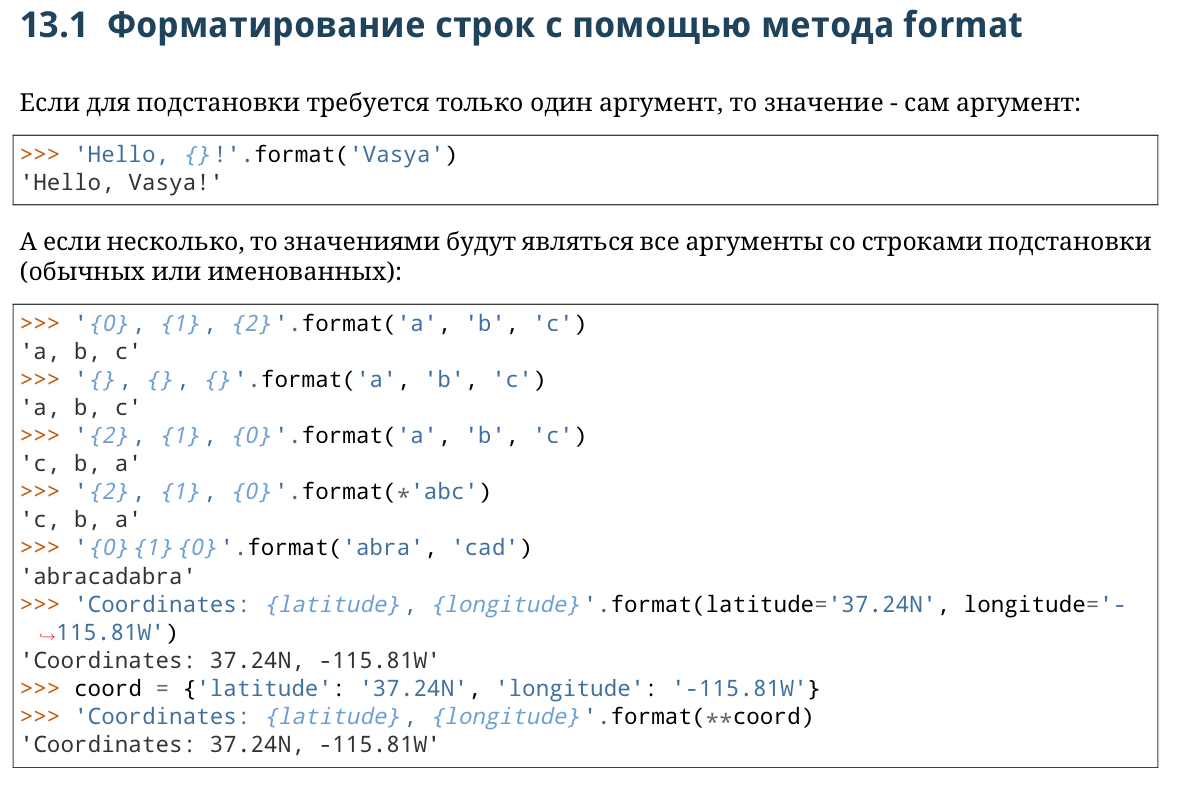

# Работа с файлами

Конечно, в реальности нам часто приходится работать с файлами. Прежде, чем работать с файлом, его надо открыть. С этим замечательно справится встроенная функция open:
``` python
f = open('text.txt', 'r')
```

У функции open много параметров, они указаны в статье "Встроенные функции", нам пока важны 3 аргумента: первый, это имя файла. Путь к файлу может быть относительным (то есть определенным относительно исполняемого файла) или абсолютным. Второй аргумент, это режим, в котором мы будем открывать файл.

Режим	Обозначение  
* 'r'	открытие на чтение (является значением по умолчанию).
* 'w'	открытие на запись, содержимое файла удаляется, если файла не существует, создается новый.
* 'a'	открытие на дозапись, информация добавляется в конец файла.
* 't'	открытие в текстовом режиме (является значением по умолчанию).
* '+'	открытие на чтение и запись.
Режимы могут быть объединены, то есть, к примеру, 'rb' - чтение в двоичном режиме. По умолчанию режим равен 'rt'.

И последний аргумент, encoding, нужен только в текстовом режиме чтения файла. Этот аргумент задает кодировку. Пока нам это не нужно.



In [17]:
f = open('text.txt', 'r')
for s in range(2):
  print(f.readline())


Hello World!

Hi there


In [10]:
s1 = 'Hello!'
s2 = 'Hi!'

print(s1 + '\n' + s2)

Hello!
Hi!


### Чтение из файла
Открыли мы файл, а теперь мы хотим прочитать из него информацию. Для этого есть несколько способов, но большого интереса заслуживают лишь два из них.

Первый - метод read, читающий весь файл целиком, если был вызван без аргументов, и n символов, если был вызван с аргументом (целым числом n).
``` python
f = open('text.txt')
f.read()
'Hello world!\nThe end.\n\n'
```
Ещё один способ сделать это - прочитать файл построчно, воспользовавшись циклом for:
``` python
f = open('text.txt')
for line in f:
    print(line)
'Hello world!\n'
'\n'
'The end.\n'
'\n'
```



In [20]:
f = open('text.txt')

for line in f:
  print(line)

Hello World!

Hi there


### Запись в файл

Запись в файл осуществляется с помощью метода write:
``` python
f = open('text.txt', 'w')
l = ['1', '2', '3', '4', '5']
for index in l:
     f.write(index + '\n')
```
Кстати, метод write сам по себе возвращает число записанных символов.

После окончания работы с файлом его обязательно нужно закрыть с помощью метода close:

``` python
f.close()
```

In [28]:
f = open('text2.txt', 'w')

le = [1, 2, 3]

for i in le:
  f.write(str(i) + ' ')


### Упражнение 3.1. Калькулятор в файл
В файле input.txt (вам необходимо его создать) на первой строке перечислены числа (через пробел), на второй строке написан символ арифметической операции (+, -, *), которую необходимо выполнить с ними. Необходимо вывести в файл output.txt результат выполнения арифметической операции.

В файле input.txt:
```python
1 2
+
```
В файле output.txt:

```python
Result of {знак операции} operation with {число 1} and {число 2}:
3
```




### Упражнение 3.2. Решето Эратосфена
Есть натуральное число N, хотим найти все простые числа, которые не превышают N.

Вход:
```python
5
```

Выход:
```python
1, 2, 3 ИЛИ 1 2 3
```

## Обработка текста

Еще одним способом открыть файл в python является конструкция `with ... as ...`

```python
with open("exmpl.txt", "r") as f:
    text = f.read()
```
Она является более удобной, поскольку отдельно выделяет в коде блок, в котором мы работаем с файлом, а также потому что не требует закрытия файла отдельной командой.

Кроме того, если нам надо считать файл как список строк, мы можем использовать команду `list_name = f.readlines()`. Аналогично для записи списка строк построчно в файл есть команда `f.writelines(list_name)`.

Можно считывать несколько файлов одновременно. Представим, что нам нужно объединить содержание двух файлов:

```python
f1 = open('file1.txt', 'r')
f2 = open('file2.txt', 'r')

L1 = f1.readlines()
L2 = f2.readlines()

L3 = L1 + L2

f1.close()
f2.close()

f3 = open('file3.txt', 'wb')

f3.writelines(L3)

f3.close()
```

Однако мы можем сделать то же самое используя `with ... as ...` следующим образом:

```python
with open('file1.txt', 'r') as f1, open('file2.txt', 'r') as f2:
    L1 = f1.readlines()
    L2 = f2.readlines()

L3 = L1 + L2

with open('file3.txt', 'w') as f3:
    f3.writelines(L3)
```
или даже

```python
with open('file1.txt', 'r') as infile1, open('file2.txt', 'r') as infile2, open('file3.txt', 'w') as outfile:
    L1 = infile1.readlines()
    L2 = infile2.readlines()
    L3 = L1 + L2
    outfile.writelines(L3)
```
Согласитесь, выглядит шикарно. Главное открывать только те файлы, которые нужны вам в данный момент.


### Упражнение 3.3. Предложения
Определить количество предложений в заданном текстовом файле.

Вход. В файле input.txt задан фрагмент текста на английском языке. Гарантируется, что в тексте отсутствуют тире, дефисы, цифры и числа.

Выход. Вывести количество предложений в фрагменте.

|Пример входа|Пример выхода|
|-|-|
|Hello world!|1|
|Hello... World?!|2|

## Однопроходные алгоритмы
#### **Упражнение 3.4. Перестановка**

Переставьте соседние элементы в списке. Задача решается в три строки.

|Ввод|Вывод|
|-|-|
|1 2 3 4 5|2 1 4 3 5|

#### **Упражнение 3.5. Циклический сдвиг**
Выполните циклический сдвиг элементов списка вправо. Решите задачу в две строки.

|Ввод|Вывод|
|-|-|
|1 2 3 4 5|5 1 2 3 4|

#### **Упражнение 3.6. Уникальные элементы**
Выведите элементы, которые встречаются в списке только один раз. Элементы нужно выводить в том порядке, в котором они встречаются в списке.

|Ввод|Вывод|
|-|-|
|1 2 2 3 3 3|1|

В этой задаче нельзя модицифицировать список, использовать вспомогательные списки, строки, срезы.

#### **Упражнение 3.7. Самое частое число**
Определите, какое число в этом списке встречается чаще всего. Если таких чисел несколько, выведите любое из них.

|Ввод|Вывод|
|-|-|
|1 2 3 2 3 3|3|

В этой задаче также нельзя модицифицировать список, использовать вспомогательные списки, строки, срезы.

#### **Упражнение 3.8. Медиана списка**

В списке — нечетное число элементов, при этом все элементы различны. Найдите медиану списка: элемент, который стоял бы ровно посередине списка, если список отсортировать.

При решении этой задачи нельзя модифицировать данный список (в том числе и сортировать его), использовать вспомогательные списки.

Программа получает на вход нечетное число N, в следующей строке заданы N элементов списка через пробел.

Программа должна вывести единственное число — значение медианного элемента в списке.

|Ввод|Вывод|
|-|-|
|5<br/> 3 1 2 5 4|3|